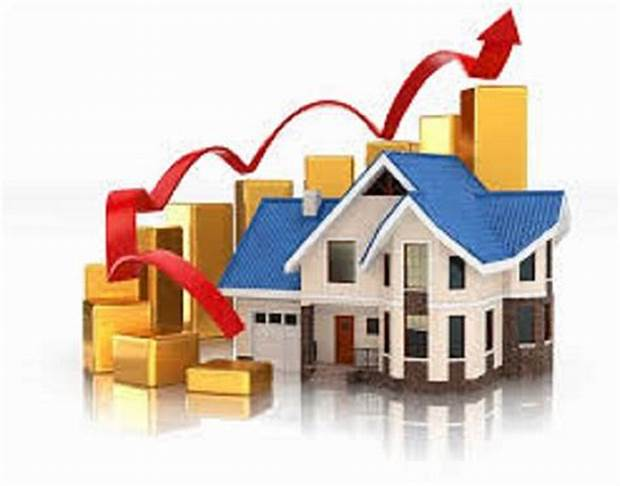

# Introduction
The real estate business is a big economic contributor to many countries since it supplies one of the most basic human needs- shelter/housing. Housing prices, on the other hand, change on a daily basis and are sometimes exaggerated rather than based on appraisal. The primary goal of this research project is to estimate house values using real-world factors. In this section, we seek to base our judgments on each and every basic factor that is considered when calculating pricing.Price is a big concern for both entrepreneurs and potential clients; it is the most important factor in determining whether an entrepreneur will purchase an asset or whether a client will choose to stay in a certain home. As a result, in this research, we'll create an algorithm to anticipate property values depending on many variables.

According to (N.Miller et al), economists and policymakers appear to agree that housing prices play a significant role in determining whether the economy grows or declines. For example, following the 2001 stock market crisis, the strong housing market may have saved the US economy from a deeper recession, and the subsequent cooling of the housing market has prompted a recession since December 2007. The wealth impact is one ostensible mechanism through which housing prices might affect the economy. People's planned consumption would change if housing price changes affected their predicted lifetime wealth, according to Friedman's permanent income hypothesis. Recently, economists proposed a collateral effect of rising house prices: because housing wealth is easier to collateralize, rising house values let homeowners relax their borrowing limits and raise their actual consumption.

## Data
The data used for this analysis was obtained from https://www.kaggle.com/datasets/shree1992/housedata. The dataset has a record of the different house prices, the number of rooms, the number of bedrooms, number of bathrooms, the size of the house in square feet and many other features related to housing. We will see these features when we import our data.

Before constructing the predictive model, it is vital to eliminate some variables that are irrelevant to our model; in this case, we are attempting to estimate property price based on the following characteristics:
* Price
* Number of bedrooms
* Number of bathrooms
* Size of living room in square feet
* Size of the lot
* House Condition

Since we now know the all the variables we want to work with, we'll remove some of the variables so we remain with a simple dataframe.

In [3]:
# Import the data
# First we'll have to import pandas library to enable us perform data preprocessing and load our data
import pandas as pd
Data= pd.read_csv("Real_Estate.csv")
Data.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# Now we'll create a new dataframe with only our relevant variables;
Housing=Data[['price', 'bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'condition']]
Housing.head(n=10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition
0,313000.0,3.0,1.50,1340,7912,3
1,2384000.0,5.0,2.50,3650,9050,5
2,342000.0,3.0,2.00,1930,11947,4
3,420000.0,3.0,2.25,2000,8030,4
4,550000.0,4.0,2.50,1940,10500,4
5,490000.0,2.0,1.00,880,6380,3
6,335000.0,2.0,2.00,1350,2560,3
7,482000.0,4.0,2.50,2710,35868,3
8,452500.0,3.0,2.50,2430,88426,4
9,640000.0,4.0,2.00,1520,6200,3


We now have a new dataframe with the variables on which we wish to base our methods. On these variables, we can now perform summary statistics. Summary statistics, also known as descriptive statistics, are useful because they display basic statistical measurements such as minimum and maximum values, mean, standard deviation, and frequency, among other things. We may also check on the data types now.

In [5]:
#Summary Statistics
Housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,3.451739
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.677230
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,3.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,3.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,4.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,5.000000


In [6]:
# Finding out the data types of the variables
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4600 non-null   float64
 1   bedrooms     4600 non-null   float64
 2   bathrooms    4600 non-null   float64
 3   sqft_living  4600 non-null   int64  
 4   sqft_lot     4600 non-null   int64  
 5   condition    4600 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 215.8 KB


## Methods
We will utilize a machine learning approach called Linear regression to predict continuous outcomes, in this case the house price. Linear regression is a machine learning approach that is used for forecasting and prediction. It also demonstrates the impact of an independent variable on a dependent variable. The variables that explain or predict the outcome of a dependent variable are known as independent variables. A dependent variable, on the other hand, is the variable we want to forecast. Linear regression uses the least square method.

In this study, the price is the dependent variable, while the independent variables are the number of bedrooms, bathrooms, living room size in square feet, lot size in square feet, and house quality.

To study the data, we'll use a step model; first, we'll utilize all of the treatments/features to build the model, then delete the inconsequential features based on our model outcome in subsequent models, and finally, we'll determine which one is the greatest fit for predicting the outcome. However, before conducting the actual analysis, we can utilize correlation analysis to discover the link between these variables.

After correlation analysis, we'll proceed to building the regression model, however, we'll first split the dataset to training set and test set. We build the model on train set and make predictions on the test set.

In [7]:
# Correlation Analysis
Corr_Matrix=round(Housing.corr(),2)  # Finds the correlation and rounding it to 2 decimal places
print(Corr_Matrix)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  condition
price         1.00      0.20       0.33         0.43      0.05       0.03
bedrooms      0.20      1.00       0.55         0.59      0.07       0.03
bathrooms     0.33      0.55       1.00         0.76      0.11      -0.12
sqft_living   0.43      0.59       0.76         1.00      0.21      -0.06
sqft_lot      0.05      0.07       0.11         0.21      1.00       0.00
condition     0.03      0.03      -0.12        -0.06      0.00       1.00


In [32]:
# We'll have to split the dataset into a training and test set first, then we'll build the regression model and make predictions.
from sklearn.model_selection import train_test_split
y= Housing.price
X= Housing.drop('price', axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Now we'll fit the regression model; this first model has all the features
from sklearn.linear_model import LinearRegression
regr= LinearRegression()
results=regr.fit(X_train,y_train)
attributes_coefficients = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])  
attributes_coefficients

,Coefficient
bedrooms,-65516.722690
bathrooms,22573.591095
sqft_living,282.159121
sqft_lot,-0.912388
condition,58323.626129


Using the coefficients we can make inferences regarding the impact of the predictor variables on the dependent variable. Here it can be seen that:
* As the number of bedrooms decrease by one unit the price increases by 65516 dollars.
* As the number of bathrooms increase by one unit the price of the house increases as well, by 22573 dollars.
* As the size of the living room increases by one square foot, the house price increases by 282 dollars
* As the size of the lot decreases by one square foot, the price increases by 0.9 dollars
* As the house condition improves with unit, the price increases by 58323 dollars.

In [34]:
# We will now make the predictions; predictions are made on test set, thereafter, we'll compare them with the actual prices
y_pred = regr.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comparison.head(n=10)

,Actual,Predicted
4373,3.467500e+05,424457.226576
2432,4.400000e+05,526653.880484
324,2.620000e+05,469694.424420
3703,6.500000e+05,808003.384325
2571,4.990000e+05,494866.085239
4516,3.238333e+05,413701.991570
3632,4.190000e+05,441042.484137
4375,1.020000e+06,725729.960677
1601,3.690000e+05,389235.706045
866,4.400000e+05,413714.891214


In [35]:
# Let's asses whether our model is a perfect fit or not, we'll use the coefficient of determination to do this;
from sklearn import metrics 
print('Adjusted R-square:', metrics.r2_score(y_test, y_pred))

Adjusted R-square: 0.5030206974533395


In [40]:
# Fit a new model with only bathrooms, sqft_living, and condition as the only predictor variables
y= Housing.price
X= Housing.drop(labels=['price', 'sqft_lot'], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
regr2= LinearRegression()
results=regr2.fit(X_train,y_train)
attributes_coefficients = pd.DataFrame(regr2.coef_, X.columns, columns=['Coefficient'])  
attributes_coefficients


,Coefficient
bedrooms,-58658.816175
bathrooms,25122.931920
sqft_living,269.870300
condition,52821.420060


In [41]:
# Next we make the predictions
y_pred = regr2.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comparison.head(n=10)

,Actual,Predicted
124,6.000000e+05,5.282078e+05
3948,5.150000e+05,7.334844e+05
2676,5.060000e+05,5.563474e+05
1352,5.150000e+05,7.917985e+05
4243,5.990000e+05,5.013239e+05
4530,3.627500e+05,3.613282e+05
3863,2.271150e+06,1.090153e+06
4466,4.230509e+05,2.480314e+05
42,3.085000e+05,2.900580e+05
2780,5.590000e+05,3.953074e+05


In [42]:
# Now we evaluate model2 performance
print('Adjusted R-square:', metrics.r2_score(y_test, y_pred))

Adjusted R-square: 0.5072745225841059


## Findings
The results of the analysis show that the mentioned attributes, such as the number of bedrooms and bathrooms, the size of the living room, the size of the lot, and the condition of the property, all have an impact on the house's price. However, these effects vary; some have a positive impact, in that as their value rises, the price of the house rises with it, as in the case of the number of bathrooms, living room size, and house condition; others have an inverse relationship with the house, as in the case of the number of bedrooms and lot size.

It's also worth noting that model 1 and 2 all produce different results. We included all of the elements in the first model and left some out in the second (sqft lot was removed in model 2). We calculated their R-square values to see which model is the best fit for making predictions; the first model had a value of 50.3 percent, while the second had a value of 50.7 percent. As a result, we prefer the second model to the first model for making predictions.

## Conclusion
We can model the relationship between a dependent variable and an independent variable using linear regression. Linear regression can be used to predict a continuous result, such as the price of a property. We found that there is a link between the price of a house and certain of its qualities, such as the number of bedrooms, the number of bathrooms, the quality of the property, and even the size in square feet, in our investigation to calculate the price of houses. However, in the future, we'd like to know how these characteristics relate to the house condition. This may necessitate a different approach, such as logistic regression, because the new dependent variable, the house condition, is expected to be a binary outcome; therefore, linear regression will not be applicable in this case because it only predicts continuous outcomes.